In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv('results.csv')
dfmp = pd.read_csv('maxprop_manet.csv')
l7 = pd.read_csv('m512k8.csv')
df = df.append(dfmp)
df = df.append(l7)
df.replace('BFGMP', 'Proposed', inplace=True)
df.replace('MaxProp', 'MaxPROP', inplace=True)
df.replace('Seer', 'SeeR', inplace=True)
df.replace('SprayAndWait', 'Spray n\' Wait', inplace=True)
df.replace('Prophet', 'PRoPHET', inplace=True)
df.describe()

,aborted,buffer_size,buffer_size.1,buffertime_avg,buffertime_med,created,d_dist_avg,delivered,delivery_prob,distance_avg,...,removed,response_prob,seed,seed.1,sim_time,speed_avg,started,task_id,ttl,ttl.1
count,36000.000000,36000.000000,4000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,...,36000.00000,36000.0,36000.000000,4000.000000,36000.0,29400.000000,36000.000000,34000.000000,36000.0,4000.0
mean,769.917417,115.000000,115.000000,8464.940201,9489.154611,722.611111,6252.758443,410.349472,0.605831,6305.615726,...,29821.20650,0.0,46709.314444,46805.980000,21600.0,2.196694,87763.068056,268.911765,300.0,300.0
std,1268.277255,53.852396,53.858381,4206.891946,5474.734849,460.830769,195.618421,277.438520,0.198834,143.861103,...,59187.89768,0.0,31293.583882,31420.588679,0.0,0.768389,105763.593950,183.170789,0.0,0.0
min,0.000000,50.000000,50.000000,969.807500,850.000000,238.000000,5252.670543,71.000000,0.189000,5823.118792,...,115.00000,0.0,22.000000,22.000000,21600.0,0.935014,1411.000000,0.000000,300.0,300.0
25%,30.000000,75.000000,75.000000,5014.424700,4370.000000,404.000000,6132.128668,206.000000,0.472800,6218.556617,...,1088.00000,0.0,15475.000000,15475.000000,21600.0,1.607194,5023.000000,89.750000,300.0,300.0
50%,232.000000,100.000000,100.000000,9205.818700,9700.000000,594.000000,6255.694567,343.000000,0.565600,6307.034378,...,8562.50000,0.0,45907.000000,49338.500000,21600.0,2.022319,46434.000000,259.500000,300.0,300.0
75%,1019.000000,150.000000,150.000000,12351.031200,14245.000000,910.750000,6373.225555,556.000000,0.802500,6391.635699,...,24386.25000,0.0,73906.000000,73906.000000,21600.0,2.524473,139785.250000,429.250000,300.0,300.0
max,6704.000000,200.000000,200.000000,13981.541400,17660.000000,1472.000000,7041.151982,1326.000000,0.941200,6929.994313,...,379558.00000,0.0,98820.000000,98820.000000,21600.0,5.376340,431044.000000,599.000000,300.0,300.0


In [15]:
#Filter results for a specific value e.g.

#Fix the buffer size to 50MB
df = df[df.buffer_size == 150] 
#Discard results for 800 and 1000
df = df[df.nodes <= 600]

In [16]:
# Style
markers = ['o','s', '^', 'v', '<', '>', 'p']
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})

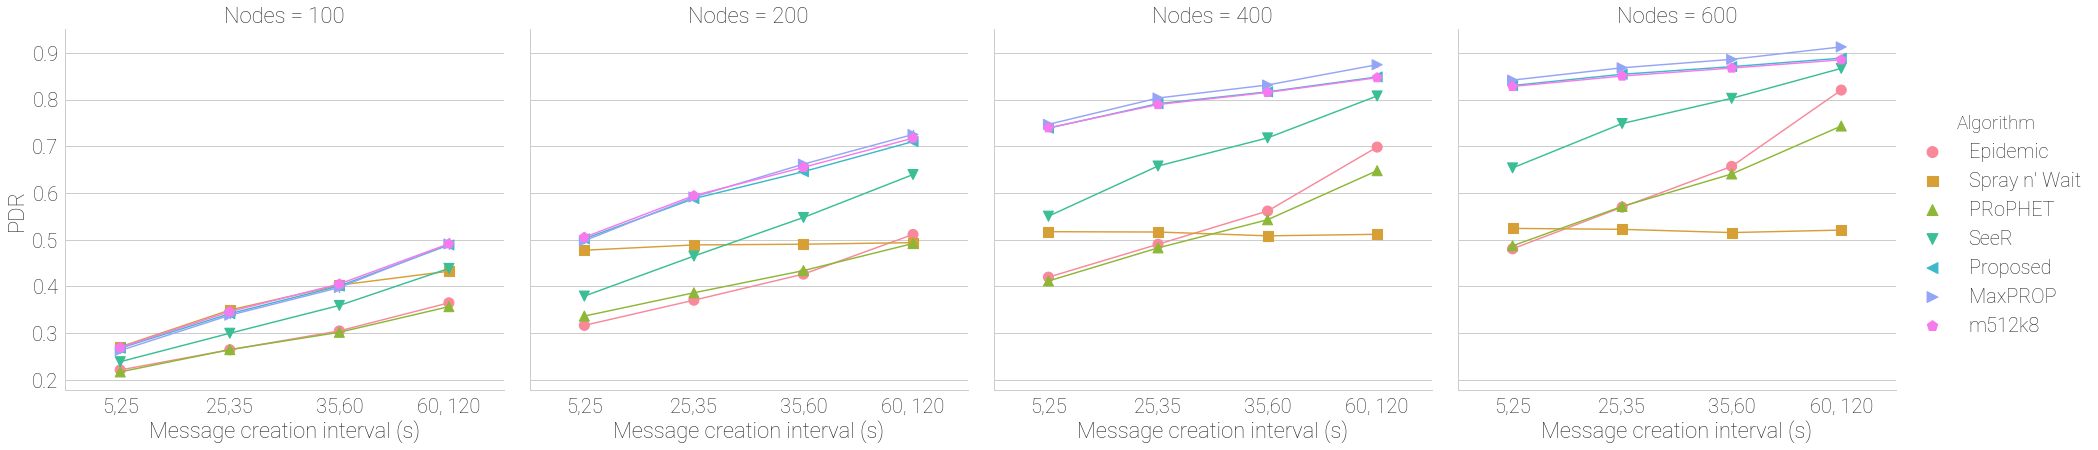

In [17]:
# Plot the delivery probability ratio
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('MANET_pdr.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Message creation interval (s)', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_pdr.svg')
    pdf.savefig()

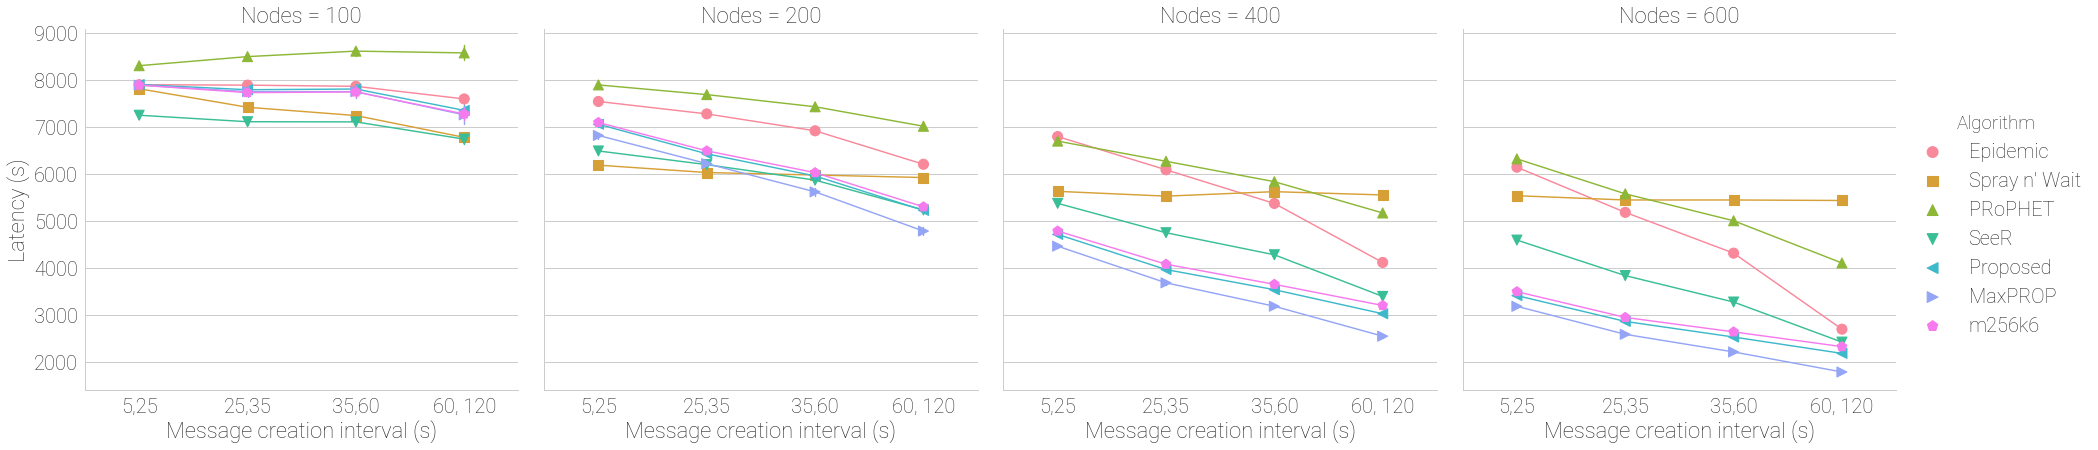

In [11]:
#Same as the above cell, for Latency
with PdfPages('MANET_latency.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_latency.svg')
    pdf.savefig()

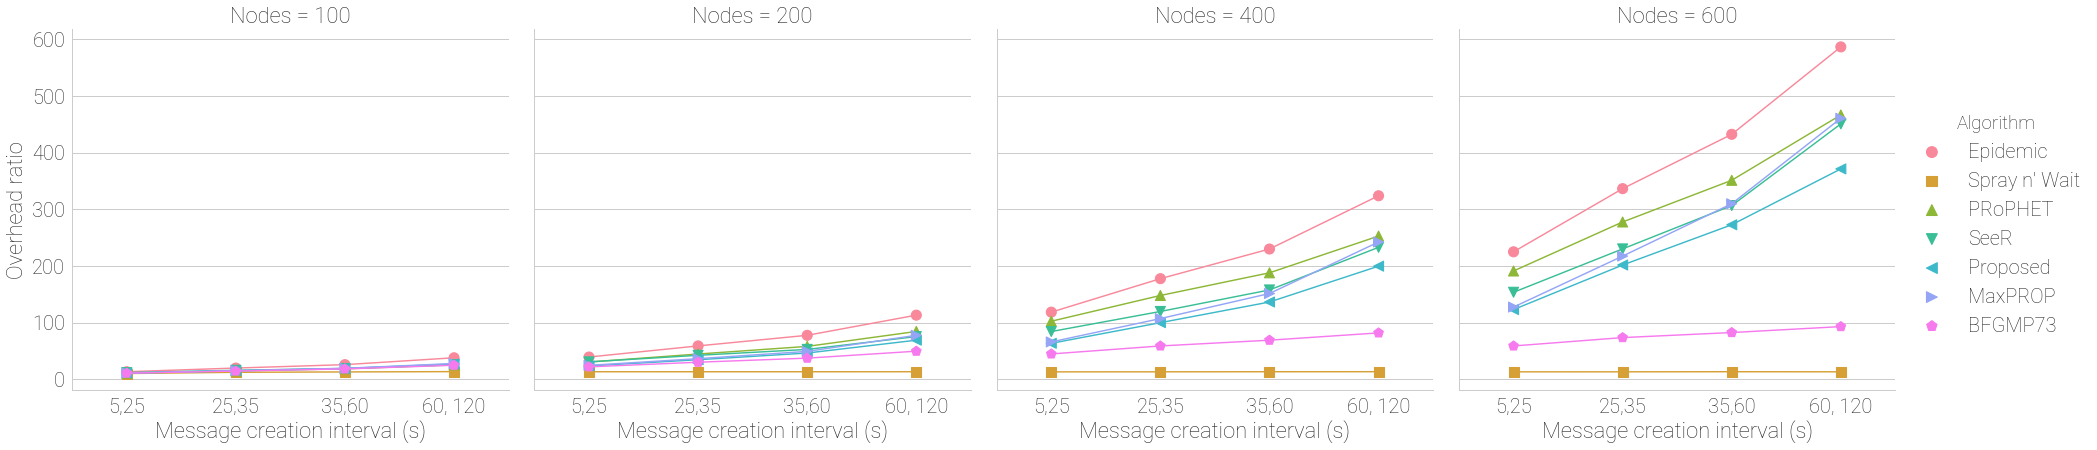

In [23]:
#Same as the above cell, for Latency
with PdfPages('MANET_overhead.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Message creation interval (s)', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_overhead.svg')
    pdf.savefig()

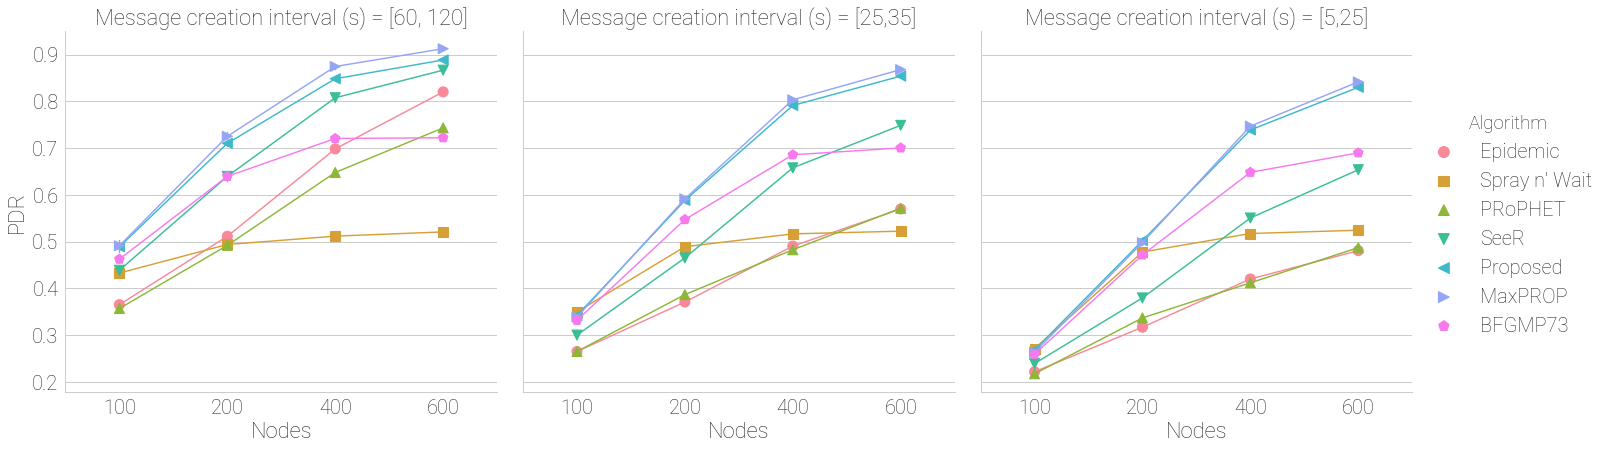

In [24]:
# Plot the ALTERNATIVE delivery probability ratio
#Saves the Packet delivery ratio plot to svg/pdf
x_axis_order = ['60, 120', '25,35', '5,25']

with PdfPages('MANET_alt_pdr.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='delivery_prob', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Nodes', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = [{col_name}]')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_alt_pdr.svg')
    pdf.savefig()

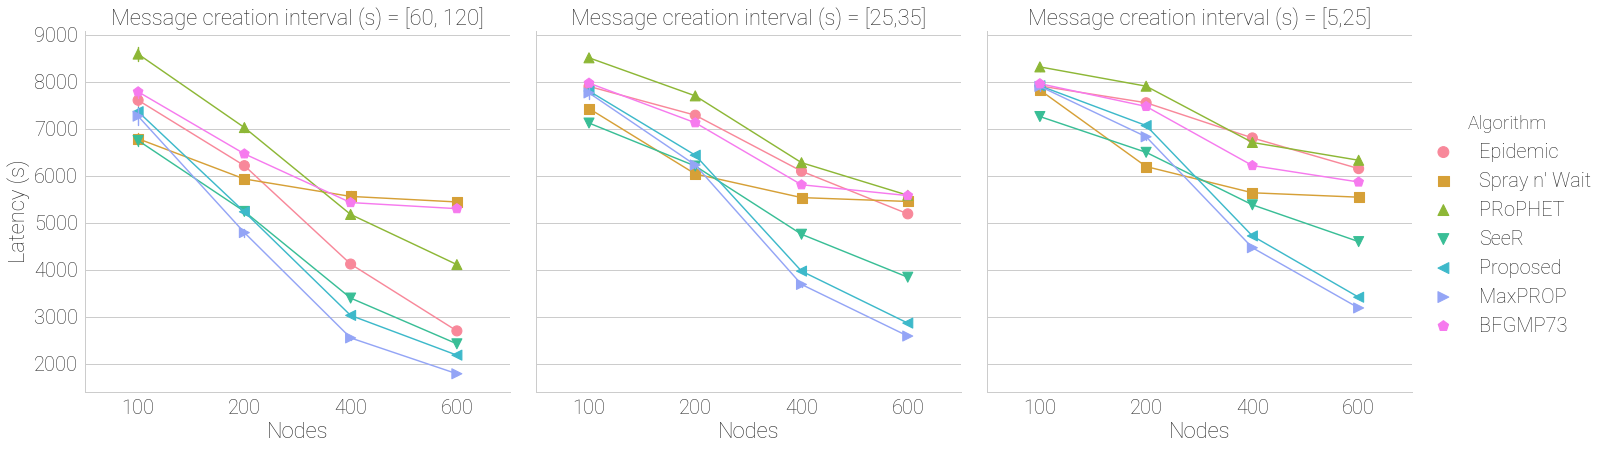

In [25]:
with PdfPages('MANET_alt_latency.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='latency_avg', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Nodes', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = [{col_name}]')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_alt_latency.svg')
    pdf.savefig()

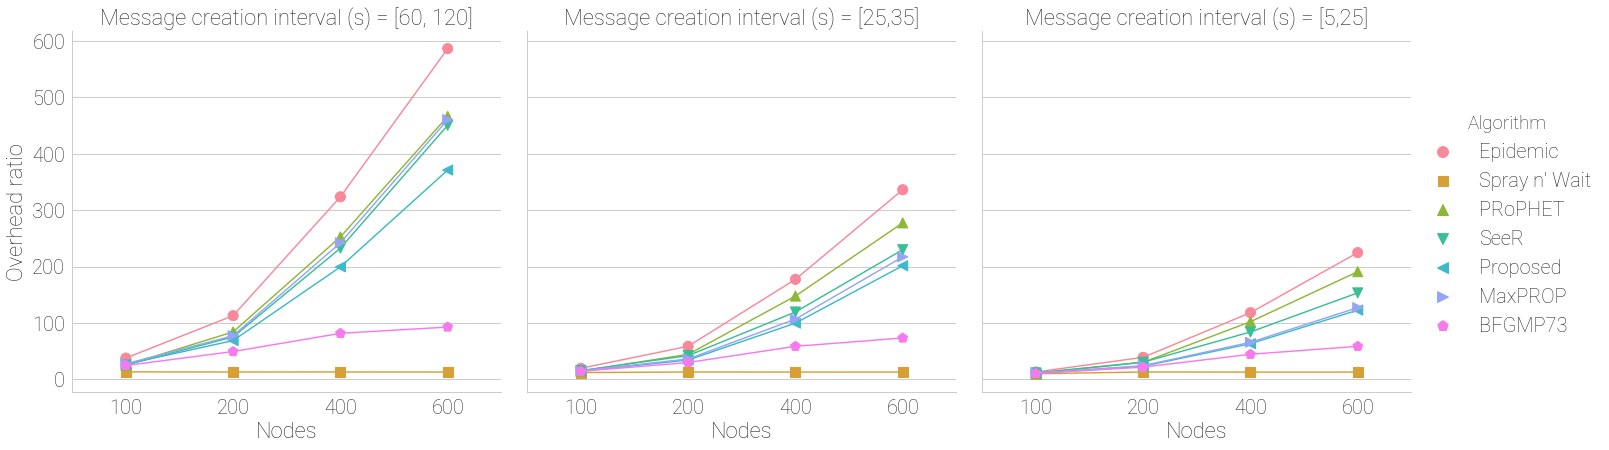

In [27]:
with PdfPages('MANET_alt_overhead.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='overhead_ratio', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Nodes', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = [{col_name}]')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_alt_overhead.svg')
    pdf.savefig()

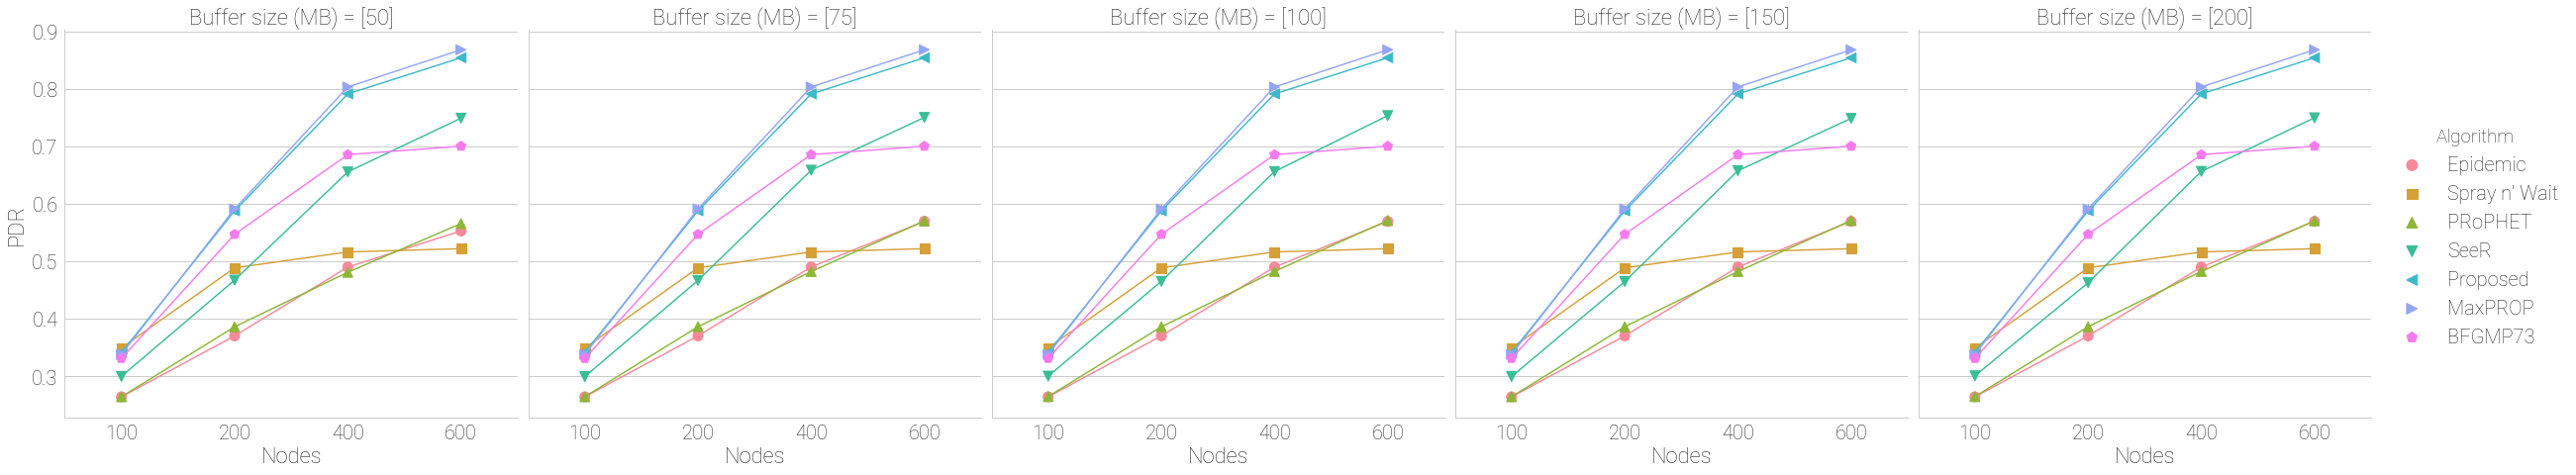

In [34]:
df = df[df.message_interval == '25,35'] 
df = df[df.nodes <= 600]
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
with PdfPages('MANET_alt_pdr.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='delivery_prob', hue='router', data=df, col='buffer_size', markers=markers, size=6.75, ci=95)
    g.set_axis_labels('Nodes', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Buffer size (MB) = [{col_name}]')
    for i in range(5):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('MANET_alt_pdr.svg')
    pdf.savefig()